[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyGenomeViz/blob/main/docs/examples/customization_tips.ipynb)

In [1]:
# Colab environment may require 'RESTART RUNTIME' to activate newly installed packages.
# %pip install pygenomeviz

## Add Subtracks (GC content & GC skew)

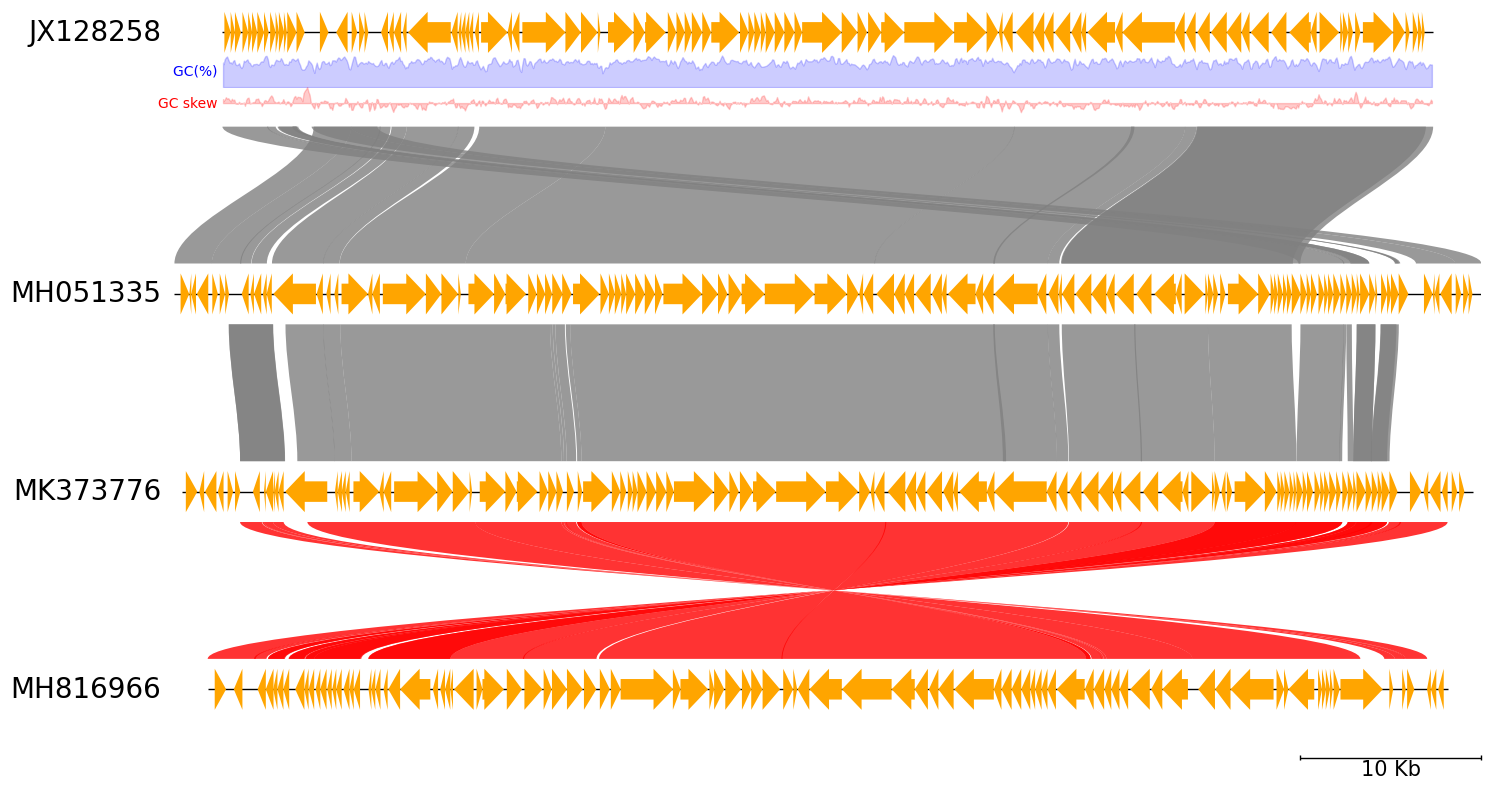

In [2]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    fig_track_height=0.8,
    feature_track_ratio=0.3,
    link_track_ratio=1.0,
    tick_track_ratio=0.3,
    align_type="center",
    tick_style="bar",
)

# Add features from genbank file
gbk_files, links = load_dataset("escherichia_phage")
gbk_list = [Genbank(f) for f in gbk_files]
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.genome_length)
    track.add_genbank_features(gbk)

# Add links
for link in links:
    link1 = (link.ref_name, link.ref_start, link.ref_end)
    link2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link1, link2, curve=True, alpha=0.8)

# Add subtracks to top track for plotting 'GC content' & 'GC skew'
gv.add_feature_subtrack(gv.top_track.name, "gc_content", ratio=0.7)
gv.add_feature_subtrack(gv.top_track.name, "gc_skew", ratio=0.7)

# Create figure
fig = gv.plotfig()

# Plot GC content for top track
gc_content_ax = gv.top_track.subtracks[0].ax  # or, gv.get_track("gc_content").ax
pos_list, gc_content_list = gbk_list[0].calc_gc_content()
gc_content_ax.set_ylim(bottom=0, top=max(gc_content_list))
pos_list += gv.top_track.offset  # Offset is required if align_type is not 'left'
gc_content_ax.fill_between(pos_list, gc_content_list, alpha=0.2, color="blue")
gc_content_ax.text(gv.top_track.offset, max(gc_content_list) / 2, "GC(%) ", ha="right", va="center", color="blue")

# Plot GC skew for top track
gc_skew_ax = gv.top_track.subtracks[1].ax  # or, gv.get_track("gc_skew").ax
pos_list, gc_skew_list = gbk_list[0].calc_gc_skew()
gc_skew_abs_max = max(abs(gc_skew_list))
gc_skew_ax.set_ylim(bottom=-gc_skew_abs_max, top=gc_skew_abs_max)
pos_list += gv.top_track.offset  # Offset is required if align_type is not 'left'
gc_skew_ax.fill_between(pos_list, gc_skew_list, alpha=0.2, color="red")
_ = gc_skew_ax.text(gv.top_track.offset, 0, "GC skew ", ha="right", va="center", color="red")

## Add Annotations

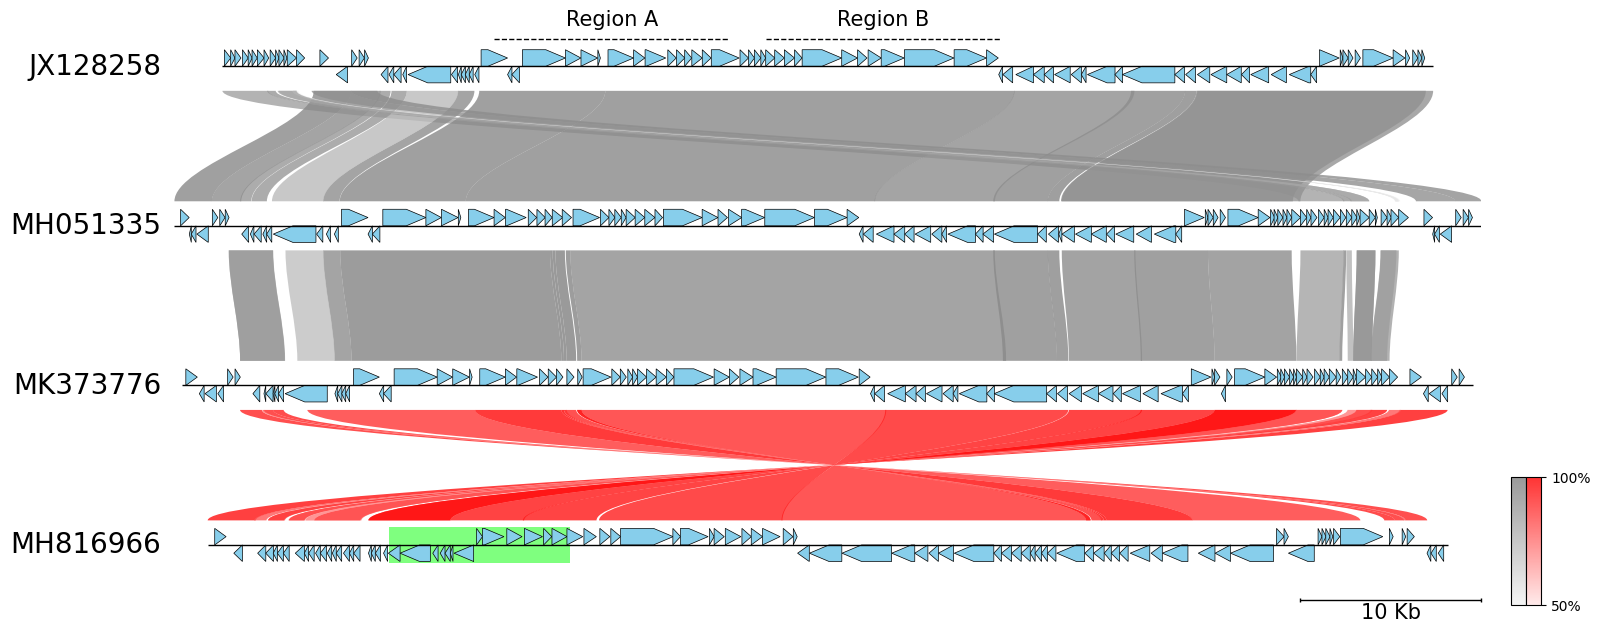

In [3]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    fig_track_height=0.8,
    feature_track_ratio=0.3,
    link_track_ratio=1.0,
    tick_track_ratio=0.3,
    align_type="center",
    tick_style="bar",
)

# Add features from genbank file
gbk_files, links = load_dataset("escherichia_phage")
gbk_list = [Genbank(f) for f in gbk_files]
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.genome_length)
    track.add_genbank_features(gbk, plotstyle="arrow", facecolor="skyblue", linewidth=0.5, arrow_shaft_ratio=1.0)

# Add links
min_identity = int(min([link.identity for link in links]))
for link in links:
    link1 = (link.ref_name, link.ref_start, link.ref_end)
    link2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link1, link2, v=link.identity, vmin=min_identity, curve=True)

# Create figure
fig = gv.plotfig()

# Add label annotation to top track
regions = (("Region A", 15000, 28000), ("Region B", 30000, 43000))  # (label, start, end)
for region in regions:
    label, start, end = region[0], region[1] + gv.top_track.offset, region[2] + gv.top_track.offset
    center = int((start + end) / 2)
    gv.top_track.ax.hlines(1.5, start, end, colors="black", linewidth=1, linestyles="dashed", clip_on=False)
    gv.top_track.ax.text(center, 2.0, label, fontsize=15, ha="center", va="bottom")

# Add box annotation to 'MH816966' track
target_track = gv.get_track("MH816966")
box_xmin, box_xmax = 10000, 20000
box_xmin += target_track.offset  # Offset is required if align_type is not 'left'
box_xmax += target_track.offset
x, y = (box_xmin, box_xmin, box_xmax, box_xmax), (1, -1, -1, 1)
target_track.ax.fill(x, y, fc="lime", linewidth=0, alpha=0.5, zorder=-10)

# Add colorbar annotation for similarity comparison links
gv.set_colorbar(fig, vmin=min_identity)


## Add Legends

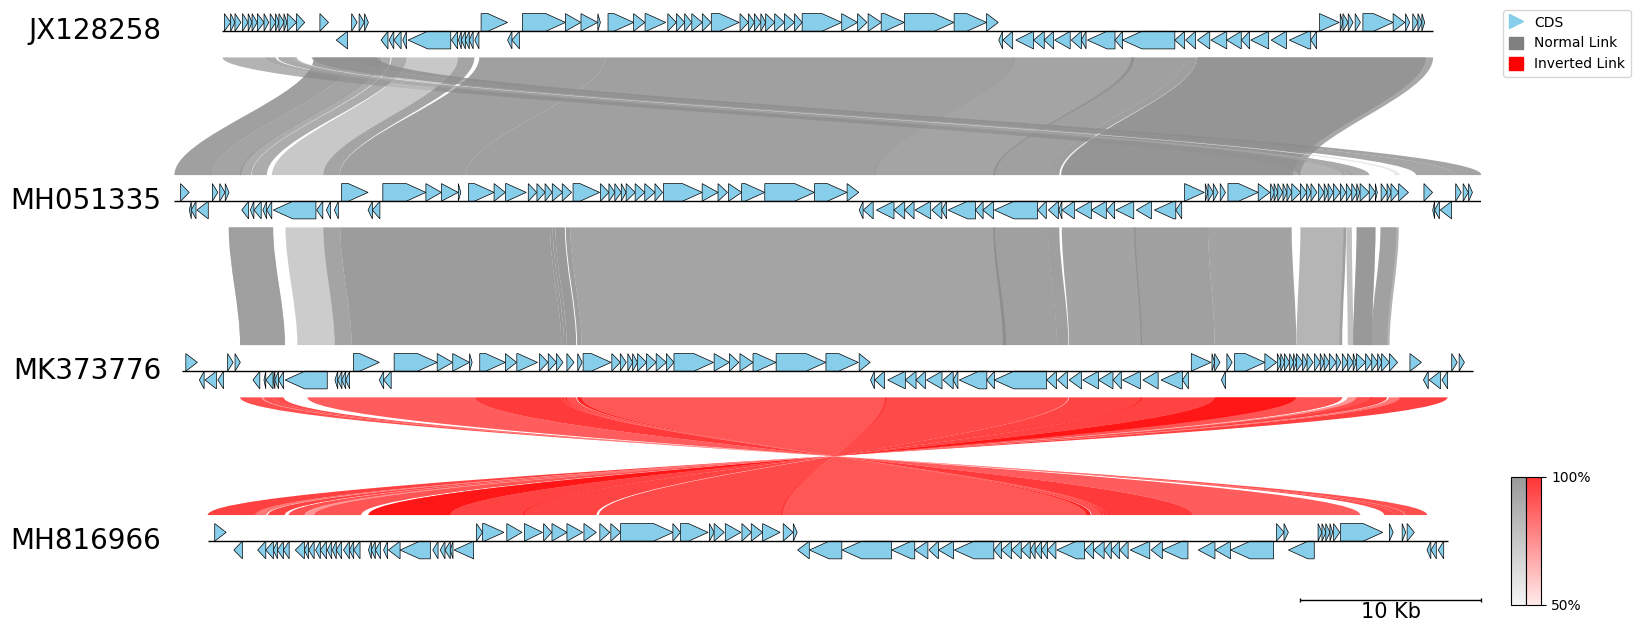

In [4]:
from pygenomeviz import Genbank, GenomeViz, load_dataset
from matplotlib.lines import Line2D
from matplotlib.patches import Patch 

gv = GenomeViz(
    fig_track_height=0.8,
    feature_track_ratio=0.3,
    link_track_ratio=1.0,
    tick_track_ratio=0.3,
    align_type="center",
    tick_style="bar",
)

# Add features from genbank file
gbk_files, links = load_dataset("escherichia_phage")
gbk_list = [Genbank(f) for f in gbk_files]
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.genome_length)
    track.add_genbank_features(gbk, plotstyle="arrow", facecolor="skyblue", linewidth=0.5, arrow_shaft_ratio=1.0)

# Add links
min_identity = int(min([link.identity for link in links]))
for link in links:
    link1 = (link.ref_name, link.ref_start, link.ref_end)
    link2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link1, link2, v=link.identity, vmin=min_identity, curve=True)

# Create figure
fig = gv.plotfig()

# Add Legends (Maybe there is a better way)
handles = [
    Line2D([], [], marker=">", color="skyblue", label="CDS", ms=10, ls="none"),
    Patch(color="grey", label="Normal Link"),
    Patch(color="red", label="Inverted Link"),
]
legend = fig.legend(handles=handles, frameon=True, bbox_to_anchor=(1, 0.99), loc="upper left", ncol=1, handlelength=1, handleheight=1)

# Add colorbar annotation for similarity comparison links
gv.set_colorbar(fig, vmin=min_identity)